In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statistics

In [2]:
df = pd.read_csv('salary.csv', encoding='utf8')
df.head()

,Unnamed: 0,X,companyName,company_starRating,company_offeredRole,company_roleLocation,company_salary,listing_jobDesc,requested_url,salary,role,location,Python,SQL
0,1,1,Kum & Go,3.4,Senior Data Analyst,"Des Moines, IA",$59K - $84K (Glassdoor est.),"Apply business, analytic, and technical knowle...",https://www.glassdoor.com/partner/jobListing.h...,71.5,Data Analyst,IA,1,1
1,2,2,Beam Inc.,3.8,Data Scientist - Supply Planning,"Chicago, IL",$84K - $120K (Glassdoor est.),Partner with Global S&OP functional areas (Sup...,https://www.glassdoor.com/partner/jobListing.h...,102.0,Data Scientist,IL,1,1
2,3,3,Utah State University,4.2,Data Scientist,"Logan, UT",$71K - $108K (Glassdoor est.),"\nClean and transform, data in preparation for...",https://www.glassdoor.com/partner/jobListing.h...,89.5,Data Scientist,UT,1,0
3,4,4,Prime Connected,2.0,Telecommunications System Technician (Data),"Providence, RI",Employer est.:$20.00 - $30.00 Per Hour,Rhode Island Telecommunications System Technic...,https://www.glassdoor.com/partner/jobListing.h...,20.0,Others,RI,0,0
4,5,6,Bloomberg Industry Group,3.6,Data Scientist,"Washington, DC",Employer est.:$110K - $130K,"Proactively explore, research, describe, and a...",https://www.glassdoor.com/partner/jobListing.h...,120.0,Data Scientist,DC,1,1


In [3]:
data = df['salary']

[Text(0.5, 1.0, 'Data Scientist Salary Density'), Text(0.5, 0, 'Salary(k)')]

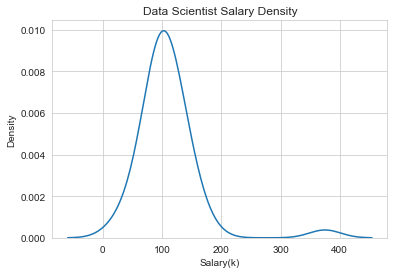

In [4]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(data), bw_method=0.5).set(title="Data Scientist Salary Density",xlabel='Salary(k)')

In [5]:
statistics.median(data) # Note that it's k

102.25

### Median Salary by Job Title

Should display a dataframe and a graph.

In [6]:
# Medium Salary by Role
df[['salary','role']].groupby('role').median()

,salary
role,
Data Analyst,81.5
Data Engineer,118.0
Data Scientist,108.0
Machine Learning,83.0
Others,20.0


/Users/tixradmin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'Data Scientist Salary by Role'), Text(0.5, 0, 'Salary(k)')]

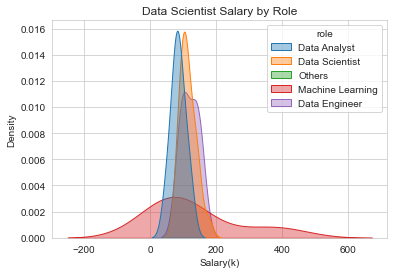

In [7]:
sns.kdeplot(data = df[['salary','role']], x = "salary", hue = "role", fill = True, common_norm = False, alpha = 0.4).set(title="Data Scientist Salary by Role",xlabel='Salary(k)')

### Median Salary by Location

Top 5 highest paid location

In [15]:
df_loc = df[['location', 'salary']].groupby('location').median().sort_values(by=['salary'],ascending = False).head(6)
df_loc

,salary
location,
NY,375.00
CO,149.50
MO,137.75
CT,136.00
FL,130.00
VA,116.00


In [12]:
list = [df_loc.index[0], df_loc.index[1], df_loc.index[2], df_loc.index[3], df_loc.index[4]]
list

['NY', 'CO', 'MO', 'CT', 'FL']

/Users/tixradmin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/tixradmin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'Data Scientist Salary by Location'),
 Text(0.5, 0, 'Salary(k)')]

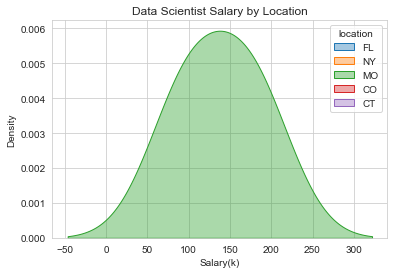

In [13]:
df_new = df[df.location.isin(list)]
sns.kdeplot(data = df_new[['salary','location']], x = "salary", hue = "location", fill = True, common_norm = False, alpha = 0.4).set(title="Data Scientist Salary by Location",xlabel='Salary(k)')

In [14]:
df_new['location'].value_counts()

MO    2
CO    2
FL    1
NY    1
CT    1
Name: location, dtype: int64

### Most Common Skill

In [17]:
df[['Python','SQL']].value_counts()

Python  SQL
1       1      18
0       0      14
1       0       6
0       1       2
dtype: int64

In [18]:
df[['Python', 'SQL']].sum(axis = 0) / df.shape[0]

Python    0.6
SQL       0.5
dtype: float64

In [22]:
#df_R = df[['R', 'salary']].groupby('R').mean()
df_Py = df[['Python', 'SQL', 'salary']].groupby(['Python','SQL']).mean()
#df_Sql = df[['SQL', 'salary']].groupby('SQL').mean()
#print(df_R)
print(df_Py)
#print(df_Sql) 

                salary
Python SQL            
0      0     95.607143
       1    118.250000
1      0    148.583333
       1    106.416667


In [21]:
df[['Python', 'SQL', 'salary']]

,Python,SQL,salary
0,1,1,71.5
1,1,1,102.0
2,1,0,89.5
3,0,0,20.0
4,1,1,120.0
5,0,0,90.0
6,1,1,130.0
7,1,1,55.0
8,1,1,108.0
9,0,0,106.0
